<a href="https://colab.research.google.com/github/frasgado/Analisis_Censo_2020/blob/main/01_PoblacionTotalporSexo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análisis de Población por Sexo**



---



In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_1 = pd.read_csv('/content/drive/MyDrive/CENSO2020/conjunto_de_datos_iter_00_cpv2020.csv', index_col=0)
df_1.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,POBFEM,POBMAS,P_0A2,P_0A2_F,P_0A2_M,P_3YMAS,P_3YMAS_F,P_3YMAS_M,P_5YMAS,P_5YMAS_F,P_5YMAS_M,P_12YMAS,P_12YMAS_F,P_12YMAS_M,P_15YMAS,P_15YMAS_F,P_15YMAS_M,P_18YMAS,P_18YMAS_F,P_18YMAS_M,P_3A5,P_3A5_F,P_3A5_M,P_6A11,P_6A11_F,P_6A11_M,P_8A14,P_8A14_F,P_8A14_M,P_12A14,P_12A14_F,...,VPH_2YMASD,VPH_1CUART,VPH_2CUART,VPH_3YMASC,VPH_C_ELEC,VPH_S_ELEC,VPH_AGUADV,VPH_AEASP,VPH_AGUAFV,VPH_TINACO,VPH_CISTER,VPH_EXCSA,VPH_LETR,VPH_DRENAJ,VPH_NODREN,VPH_C_SERV,VPH_NDEAED,VPH_DSADMA,VPH_NDACMM,VPH_SNBIEN,VPH_REFRI,VPH_LAVAD,VPH_HMICRO,VPH_AUTOM,VPH_MOTO,VPH_BICI,VPH_RADIO,VPH_TV,VPH_PC,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,96869,153485,10493,5193,5300,239441,91463,147978,232086,87931,144155,207748,76111,131637,197411,71344,126067,186968,66514,120454,10900,5270,5630,20793,10082,10711,24342,11538,12804,10337,4767,...,31851,7333,16206,38424,48426,13538,45470,8198,16498,34143,13743,44688,9825,47253,14708,35091,4842,43668,24373,5136,38199,26412,13608,30940,15001,13600,36738,40001,5797,3523,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,61324,85801,6798,3407,3391,139757,57628,82129,135028,55256,79772,119223,47543,71680,111530,44275,67255,104612,41184,63428,7028,3511,3517,13506,6574,6932,16724,7679,9045,7693,3268,...,19157,4351,9491,22351,28586,7607,26499,5054,9696,18089,7029,24348,6050,26036,10155,19807,2935,23841,16122,4115,21775,15880,7902,16699,8076,6330,20009,23198,3588,2177,25581,5027,11306,971,708,8247,10065,29741,5283,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,728924,696683,71864,35604,36260,1352235,692561,659674,1299669,666713,632956,1116719,576593,540126,1038904,538387,500517,960764,500089,460675,78833,38679,40154,156683,77289,79394,181905,89383,92522,77815,38206,...,299141,6390,30686,348487,384361,1210,383430,355192,2137,295903,152521,382597,1011,383148,2379,380982,184,382121,130744,876,365189,335710,238571,240381,45642,105752,312002,370411,177149,147818,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,1510,2187,165,81,84,3532,1429,2103,3420,1377,2043,3018,1179,1839,2836,1086,1750,2609,987,1622,169,80,89,345,170,175,427,211,216,182,93,...,531,39,116,646,723,78,694,195,107,608,405,708,27,719,82,610,16,704,203,12,632,561,276,529,216,407,650,684,167,43,732,205,212,48,41,39,62,530,20,*


In [3]:
# Definition onf new function
def clean_column_names(column_name):
    '''
    Function in charge of clean the column names in and standar camel case format
    '''
    return column_name.lower().strip().replace(' ', '_')


df_1 = df_1.rename(columns=clean_column_names)

##Filtración de datos

In [4]:
df_1_filtrado = df_1[df_1['nom_loc'] == 'Total nacional']
df_1_filtrado

,nom_ent,mun,nom_mun,loc,nom_loc,longitud,latitud,altitud,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,p_5ymas,p_5ymas_f,p_5ymas_m,p_12ymas,p_12ymas_f,p_12ymas_m,p_15ymas,p_15ymas_f,p_15ymas_m,p_18ymas,p_18ymas_f,p_18ymas_m,p_3a5,p_3a5_f,p_3a5_m,p_6a11,p_6a11_f,p_6a11_m,p_8a14,p_8a14_f,p_8a14_m,p_12a14,p_12a14_f,...,vph_2ymasd,vph_1cuart,vph_2cuart,vph_3ymasc,vph_c_elec,vph_s_elec,vph_aguadv,vph_aeasp,vph_aguafv,vph_tinaco,vph_cister,vph_excsa,vph_letr,vph_drenaj,vph_nodren,vph_c_serv,vph_ndeaed,vph_dsadma,vph_ndacmm,vph_snbien,vph_refri,vph_lavad,vph_hmicro,vph_autom,vph_moto,vph_bici,vph_radio,vph_tv,vph_pc,vph_telef,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sinltc,vph_sincint,vph_sintic,tamloc
ENTIDAD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,64540634,61473390,5764054,2848875,2915179,119976584,61554567,58422017,115693273,59433559,56259714,100528155,51962264,48565891,93985354,48732991,45252363,87492680,45530857,41961823,6462212,3193548,3268664,12986217,6398755,6587462,15287375,7531118,7756257,6542801,3229273,...,23887498,2085925,5460133,27527131,34805976,268863,33858339,29541708,1215497,22629812,9652823,33081729,1396774,33564054,1498766,32671764,79584,32979844,16874580,581095,30811260,25610544,16651199,16340788,4227460,7469168,23772973,32031555,13204680,13184550,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*


In [5]:
df_1_filtrado = df_1_filtrado[['nom_ent', 'pobtot', 'pobfem', 'pobmas']]
#df_1_filtrado.drop('ENTIDAD', axis=1, inplace=True)
df_1_filtrado['Año'] = '2020'
df_1_filtrado

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nom_ent,pobtot,pobfem,pobmas,Año
ENTIDAD,,,,,
0,Total nacional,126014024,64540634,61473390,2020


In [6]:
# Identificando tipos de datos
df_1_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nom_ent  1 non-null      object
 1   pobtot   1 non-null      int64 
 2   pobfem   1 non-null      object
 3   pobmas   1 non-null      object
 4   Año      1 non-null      object
dtypes: int64(1), object(4)
memory usage: 48.0+ bytes


## Transformación de datos

In [7]:

df_1_filtrado['Mujeres'] = round(( df_1_filtrado.pobfem.astype(float) / df_1_filtrado.pobtot ) * 100, 2)
df_1_filtrado['Hombres'] = round(( df_1_filtrado.pobmas.astype(float) / df_1_filtrado.pobtot ) * 100, 2)
df_1_filtrado
#result.cod_postal = result.cod_postal.astype(int)

# round((g.pobfem.astype(float )/g.pobtot) * 100,2)
#df_1_filtrado.groupby(['pobfem','pobtot'], group_keys=False).apply(lambda g: ) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,nom_ent,pobtot,pobfem,pobmas,Año,Mujeres,Hombres
ENTIDAD,,,,,,,
0,Total nacional,126014024,64540634,61473390,2020,51.22,48.78


In [8]:
df_1_filtrado

,nom_ent,pobtot,pobfem,pobmas,Año,Mujeres,Hombres
ENTIDAD,,,,,,,
0,Total nacional,126014024,64540634,61473390,2020,51.22,48.78


In [9]:
#df_mapping = df_1_filtrado[['Año','Mujeres','Hombres']]
df_mapping = df_1_filtrado
df_mapping

,nom_ent,pobtot,pobfem,pobmas,Año,Mujeres,Hombres
ENTIDAD,,,,,,,
0,Total nacional,126014024,64540634,61473390,2020,51.22,48.78


In [10]:
#Desglosar por estado, sexo y %
df_1_filtrado_3 = df_mapping.melt(id_vars=['Año'],
                                       value_vars=['Mujeres', 'Hombres'], 
                                       var_name='sexo', 
                                       value_name='value')
df_1_filtrado_4 = df_mapping.melt(id_vars=['Año'],
                                       value_vars=['pobfem', 'pobmas'],
                                       var_name='cantidad', 
                                       value_name='valor')


df1 = df_1_filtrado_3.set_index(['Año',  df_1_filtrado_3.groupby(['Año']).cumcount()])
df2 = df_1_filtrado_4.set_index(['Año', df_1_filtrado_4.groupby(['Año']).cumcount()])


df3 = (pd.concat([df1, df2],axis=1)
         .sort_index(level=1)
         .reset_index(level=1, drop=True)
         .reset_index())
df3

,Año,sexo,value,cantidad,valor
0,2020,Mujeres,51.22,pobfem,64540634
1,2020,Hombres,48.78,pobmas,61473390


In [11]:
# Ordenación por columnas sexo y value(%)
tab_df = df_1_filtrado_3.sort_values(by=['sexo','value'], ascending=False)
tab_df = tab_df.reset_index()
tab_df.drop('index', axis=1, inplace=True)
tab_df


,Año,sexo,value
0,2020,Mujeres,51.22
1,2020,Hombres,48.78


In [12]:
df_1_filtrado

,nom_ent,pobtot,pobfem,pobmas,Año,Mujeres,Hombres
ENTIDAD,,,,,,,
0,Total nacional,126014024,64540634,61473390,2020,51.22,48.78


In [13]:
df3

,Año,sexo,value,cantidad,valor
0,2020,Mujeres,51.22,pobfem,64540634
1,2020,Hombres,48.78,pobmas,61473390


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Año       2 non-null      object 
 1   sexo      2 non-null      object 
 2   value     2 non-null      float64
 3   cantidad  2 non-null      object 
 4   valor     2 non-null      object 
dtypes: float64(1), object(4)
memory usage: 208.0+ bytes


In [15]:
# Convertir el tipo de datos de 'cod_postal' float64 a int
print('*** Cambiar tipo de datos a la columna <<cod_postal>>')
df3.valor = df3.valor.astype(int)
df3.info()


*** Cambiar tipo de datos a la columna <<cod_postal>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Año       2 non-null      object 
 1   sexo      2 non-null      object 
 2   value     2 non-null      float64
 3   cantidad  2 non-null      object 
 4   valor     2 non-null      int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 208.0+ bytes


##**Instalación de PLOTNINE**

In [16]:
pip install 'plotnine[all]'  # 2. includes extra/optional packages


     |████████████████████████████████| 8.8MB 9.2MB/s 


## Visualización de datos
- Usando plotnine

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


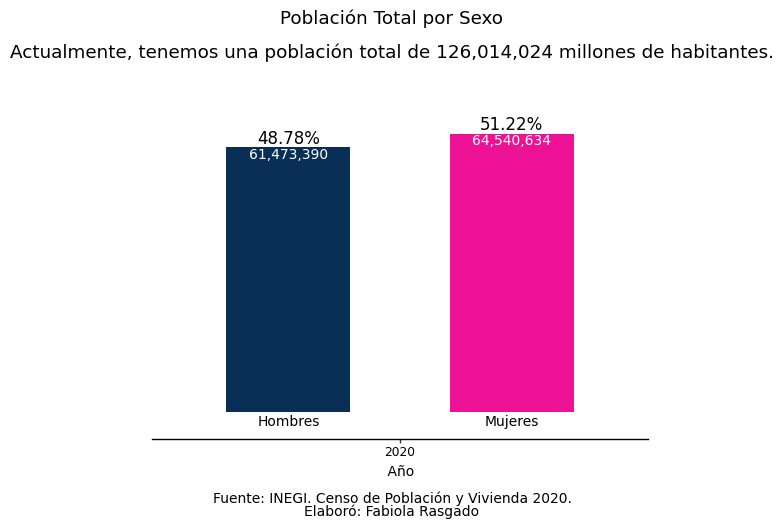

<ggplot: (8731099661289)>

In [17]:
import pandas as pd
import numpy as np
from plotnine import *

%matplotlib inline

dodge_text = position_dodge(width=0.9)
ccolor = '#555555'

# Gráfica Censo 2020 por porcentaje en tipo de sexo
# Población total por sexo
# Porcentaje de Hombres
# Porcentaje de Mujeres
# 2020

myPlot = (ggplot(df3, aes(x='Año', y='value', fill='sexo'))
 + geom_col(stat = "identity", width = 0.5, position = position_dodge(0.9), show_legend=False)
 #+ geom_col(stat='identity', position='dodge', show_legend=False) # position =  position_dodge(width = 0.8),
 #+ geom_col(position = position_stack(reverse = True), alpha=0.7)
 
 + geom_text(aes(y=-.5, label='sexo'),
             position=dodge_text,
             color='black', size=10, angle=0, va='top')              # modified
+ geom_text(aes(label = "valor"), 
            position=dodge_text,
            size=10,
            color='white',
            va='top',  #'top', 'bottom', 'center', 'baseline', 'center_baseline'
            #show_legend=True,
            format_string="{:,}")
 + geom_text(aes(label='value'),
             position=dodge_text,
             size=12, 
             va='bottom', 
             format_string='{}%')

#+ scale_color_brewer(palette='Pastel2')
#+ scale_fill_manual(values = ["blue", "pink"])
+ scale_fill_manual(values = ["#092f57", "#ed1195"]) #0070c0, #3333FF   [pink]
 + lims(y=(-2, 60))
 + theme(panel_background=element_rect(fill='white'),               # new
         axis_title_x=element_text(size=10),
         axis_title_y=element_blank(),
         axis_line_x=element_line(color='black'),
         axis_line_y=element_blank(),
         axis_text_y=element_blank(),
         axis_text_x=element_text(color='black'),
         axis_ticks_major_y=element_blank(),
         panel_grid=element_blank(),
         panel_border=element_blank())
 
+ labs(title="Población Total por Sexo\n\nActualmente, tenemos una población total de 126,014,024 millones de habitantes.", 
       x='    Año\n\nFuente: INEGI. Censo de Población y Vivienda 2020.\nElaboró: Fabiola Rasgado')

)
myPlot
# Grabar gráfica
#myPlot.save("02_composicion_por_sexo.png", dpi=600)
